# 1. Pre-processamento: Identificacao de Outliers e Normalizacao


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Carregar dados
iris = pd.read_csv('iris.csv')

# Separar atributos numericos
X = iris.drop('class', axis=1)

# Identificar outliers usando metodo IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Filtrar dados sem outliers
is_outlier = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X_no_outliers = X.loc[~is_outlier]
y_no_outliers = iris.loc[~is_outlier, 'class']

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_outliers)

print(f'Dados originais: {iris.shape}')
print(f'Dados sem outliers: {X_no_outliers.shape}')

Dados originais: (150, 5)
Dados sem outliers: (146, 4)


# 2. KMeans: Agrupamentos, Silhouette, Elbow e Caracterizacao


c:\Users\augus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\augus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\augus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\augus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

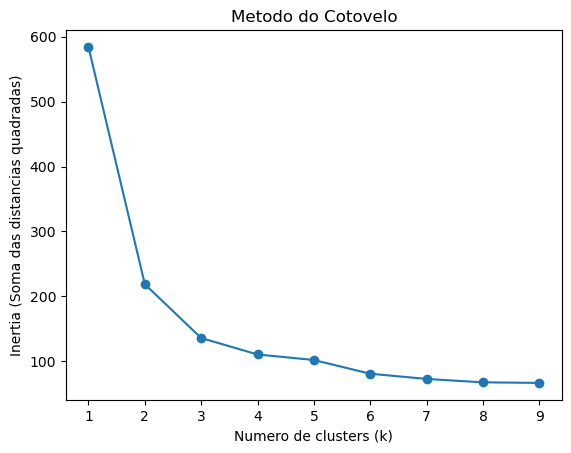

c:\Users\augus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\augus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\augus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\augus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

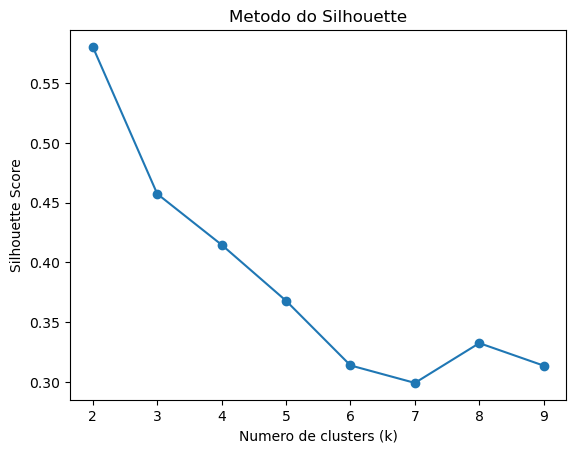

c:\Users\augus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, inertia, '-o')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Inertia (Soma das distancias quadradas)')
plt.title('Metodo do Cotovelo')
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette)

plt.figure()
plt.plot(range(2,10), silhouette_scores, '-o')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Metodo do Silhouette')
plt.show()

# Melhor k
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# 3. Hiperparametros do KMeans


KMeans possui os principais hiperparametros:

- `n_clusters`: numero de clusters (K)
- `init`: como os centroides sao escolhidos (padrao: 'k-means++')
- `n_init`: numero de vezes que o algoritmo sera rodado com centroides diferentes
- `max_iter`: numero maximo de iteracoes

# 4. Equacoes das Metricas de Distancia


Distancia Euclidiana:

\[ d(p,q) = \sqrt{\sum_{i=1}^{n}(p_i - q_i)^2} \]

Distancia de Manhattan:

\[ d(p,q) = \sum_{i=1}^{n} |p_i - q_i| \]

# 5. Outra Metodologia de Avaliacao: Davies-Bouldin Index


In [12]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X_scaled, labels_kmeans)
print(f'Davies-Bouldin Index para KMeans: {db_index:.4f}')

Davies-Bouldin Index para KMeans: 0.8385


# 6. Outro Algoritmo: DBSCAN


In [13]:
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Comparacao
print('Clusters encontrados:')
print(f'KMeans: {len(np.unique(labels_kmeans))}')
print(f'DBSCAN: {len(np.unique(labels_dbscan))}')

Clusters encontrados:
KMeans: 3
DBSCAN: 3


# 7. Analise de Instancias Agrupadas Incorretamente


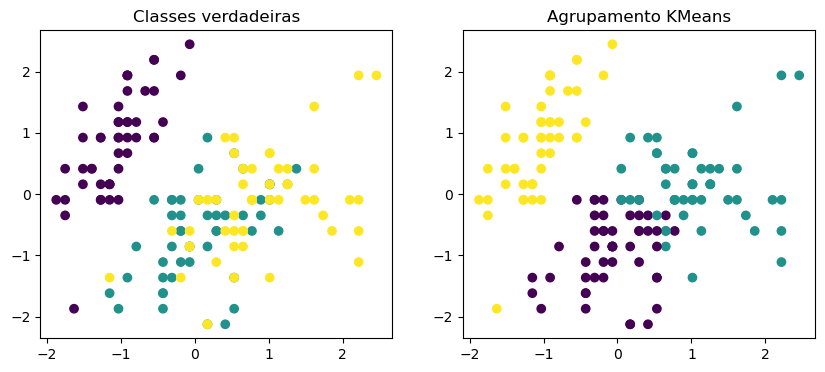

KMeans Cluster   0   1   2
Real                      
0                0   0  47
1               37  12   0
2               12  38   0


In [14]:
from sklearn.preprocessing import LabelEncoder

# Codificar classes verdadeiras
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_no_outliers)

# Comparar KMeans vs verdadeiro
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_encoded)
plt.title('Classes verdadeiras')

plt.subplot(1,2,2)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_kmeans)
plt.title('Agrupamento KMeans')

plt.show()

# Confusao de instancias
confusion = pd.crosstab(y_encoded, labels_kmeans,
                        rownames=['Real'], colnames=['KMeans Cluster'])
print(confusion)